In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Importing train and test dataset


In [ ]:
df = pd.read_csv('heart.csv')

## Data Information

In [ ]:
df.shape

(303, 14)

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## Checking NaN

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Scaling the Data

In [ ]:
Scaler = MinMaxScaler()
Scaler.fit(df)
df = Scaler.transform(df)
df = pd.DataFrame(df)
df.columns = ['Age','Sex','Chest Pain', 'Resting Blood Pressure', 'Serum Cholestoral (mg/dl)', 'Fasting Blood Sugar', 'Resting Electrocardiographic Results', 'Maximum Heart Rate Achieved', 'Exercise Induced Angina', 'Oldpeak', 'Slope', ' Number of Major Vessels', 'Thal', 'Target']
df.tail()

,Age,Sex,Chest Pain,Resting Blood Pressure,Serum Cholestoral (mg/dl),Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,Oldpeak,Slope,Number of Major Vessels,Thal,Target
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0
302,0.583333,0.0,0.333333,0.339623,0.251142,0.0,0.0,0.786260,0.0,0.000000,0.5,0.25,0.666667,0.0


## Creating Target Data

In [ ]:
df_target = df['Target']
df = df.drop('Target', axis= 1)

## train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df, df_target, test_size= 0.2, random_state= 42)

## Creating the Model

In [ ]:
KNN = KNeighborsClassifier(n_neighbors= 3, weights= 'distance', p=3)
KNN.fit(X_train, Y_train)
result = KNN.predict(X_test)

## Evaluating the Model

In [ ]:
accuracy_score(result, Y_test)* 100

88.52459016393442

Text(113.9222222222222, 0.5, 'Predicted')

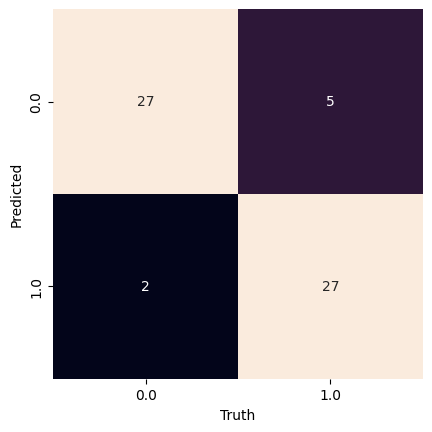

In [ ]:
mat = confusion_matrix(result, Y_test)
names = np.unique(result)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')